<a href="https://colab.research.google.com/github/FrancisEyash/HeadstarterBrainTumorClassification/blob/main/HeadstarterBrainTumorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:07<00:00, 23.8MB/s]
100% 149M/149M [00:07<00:00, 20.4MB/s]


In [3]:
def get_class_paths(path): # path is likely the root directory
  classes = [] # stores labels
  class_paths = [] # stores the file paths of images

  #Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label) # label_path combines path and label to form the full path of each class directory

    #check if it's a directory
    if os.path.isdir(label_path): # checks if label_path is a directory
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image) # image_path combines label_path and image to form the full path of each image

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)


  # create a dataframe with the collected data where each row is a class path and a class.
  df = pd.DataFrame({
      "Class Path": class_paths, # the file path of an image
      "Class": classes # the class label associated with the image
  })

  return df

In [4]:
tr_df = get_class_paths("/content/Training")

In [5]:
tr_df

Class Path    Class
0     /content/Training/notumor/Tr-no_0794.jpg  notumor
1     /content/Training/notumor/Tr-no_1039.jpg  notumor
2     /content/Training/notumor/Tr-no_0972.jpg  notumor
3     /content/Training/notumor/Tr-no_0559.jpg  notumor
4     /content/Training/notumor/Tr-no_1252.jpg  notumor
...                                        ...      ...
5707   /content/Training/glioma/Tr-gl_0255.jpg   glioma
5708   /content/Training/glioma/Tr-gl_0182.jpg   glioma
5709   /content/Training/glioma/Tr-gl_0553.jpg   glioma
5710   /content/Training/glioma/Tr-gl_0380.jpg   glioma
5711   /content/Training/glioma/Tr-gl_0286.jpg   glioma

[5712 rows x 2 columns]

In [6]:
ts_df = get_class_paths("/content/Testing")

In [7]:
ts_df

Class Path    Class
0       /content/Testing/notumor/Te-no_0097.jpg  notumor
1       /content/Testing/notumor/Te-no_0301.jpg  notumor
2     /content/Testing/notumor/Te-noTr_0000.jpg  notumor
3       /content/Testing/notumor/Te-no_0222.jpg  notumor
4       /content/Testing/notumor/Te-no_0139.jpg  notumor
...                                         ...      ...
1306     /content/Testing/glioma/Te-gl_0280.jpg   glioma
1307     /content/Testing/glioma/Te-gl_0163.jpg   glioma
1308     /content/Testing/glioma/Te-gl_0194.jpg   glioma
1309     /content/Testing/glioma/Te-gl_0146.jpg   glioma
1310     /content/Testing/glioma/Te-gl_0224.jpg   glioma

[1311 rows x 2 columns]

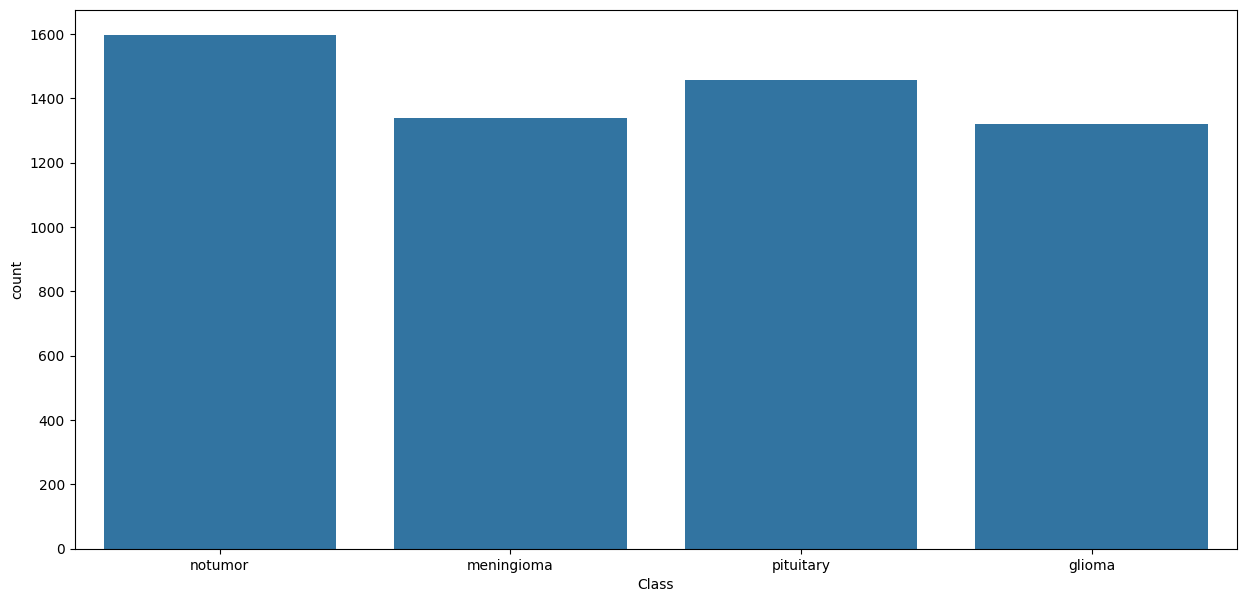

In [8]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = tr_df, x = tr_df["Class"]) # The data is fairly balanced

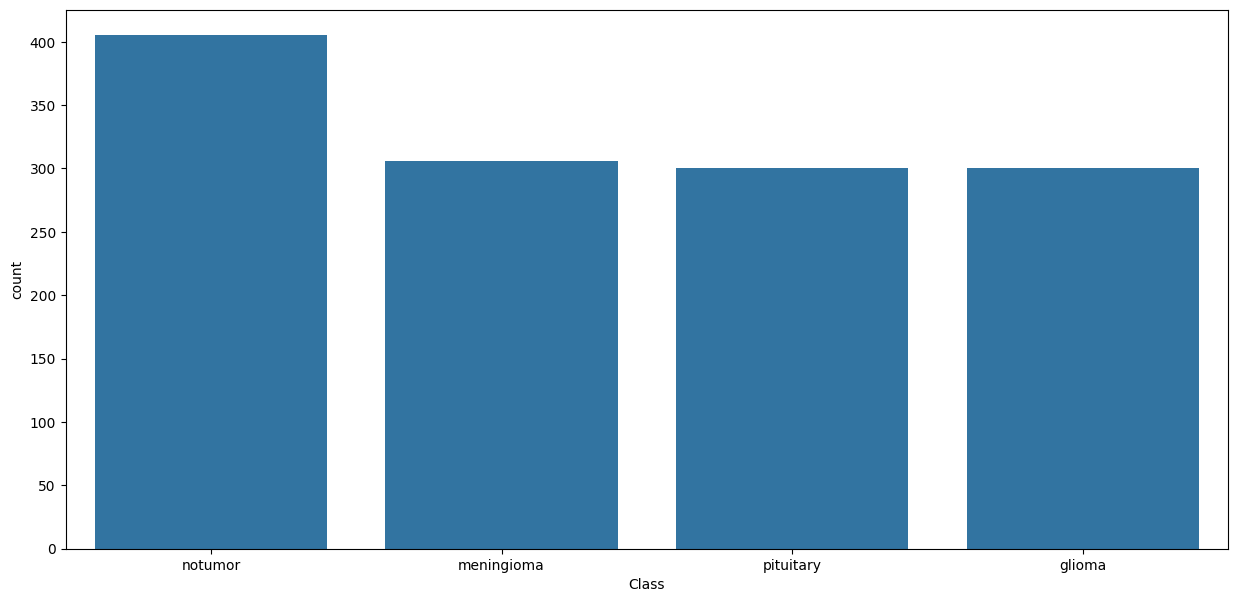

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = ts_df, x = ts_df["Class"]) # The data is fairly balanced as well

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import ResNet50


In [11]:
valid_df, ts_df = train_test_split(ts_df, test_size=0.5, stratify=ts_df["Class"]) # 50% ts_df, 50% valid_df

# stratify ensures that the split preserves the distribution of values in the "Class" column across valid_df and ts_df. In other words, both sets will have a similar
# proportion of each class as in the original ts_df.

In [12]:
valid_df

Class Path       Class
471   /content/Testing/meningioma/Te-me_0123.jpg  meningioma
94       /content/Testing/notumor/Te-no_0198.jpg     notumor
526   /content/Testing/meningioma/Te-me_0017.jpg  meningioma
100      /content/Testing/notumor/Te-no_0169.jpg     notumor
1035      /content/Testing/glioma/Te-gl_0243.jpg      glioma
...                                          ...         ...
447   /content/Testing/meningioma/Te-me_0291.jpg  meningioma
1007   /content/Testing/pituitary/Te-pi_0035.jpg   pituitary
1236      /content/Testing/glioma/Te-gl_0145.jpg      glioma
15       /content/Testing/notumor/Te-no_0269.jpg     notumor
736    /content/Testing/pituitary/Te-pi_0020.jpg   pituitary

[655 rows x 2 columns]

In [13]:
ts_df

Class Path       Class
554   /content/Testing/meningioma/Te-me_0176.jpg  meningioma
1248      /content/Testing/glioma/Te-gl_0138.jpg      glioma
862    /content/Testing/pituitary/Te-pi_0043.jpg   pituitary
129      /content/Testing/notumor/Te-no_0053.jpg     notumor
298      /content/Testing/notumor/Te-no_0183.jpg     notumor
...                                          ...         ...
1098      /content/Testing/glioma/Te-gl_0247.jpg      glioma
875    /content/Testing/pituitary/Te-pi_0067.jpg   pituitary
273      /content/Testing/notumor/Te-no_0102.jpg     notumor
147    /content/Testing/notumor/Te-noTr_0001.jpg     notumor
1301      /content/Testing/glioma/Te-gl_0086.jpg      glioma

[656 rows x 2 columns]

In [14]:

# PRE-PROCESSING THE DATA

# In order to pre-process our data we first need to set up some basic parameters.

# 1. Batch size -> number of images the model will process at once
batch_size = 32

# 2. Resizing the images to a similar size so that it doesn't throw away our model.
img_size = (224, 224)

# 3. Rescaling the pixels from 0 -> 255 to 0 -> 1(so this helps our model learn better) and also randomly adjusts the brightness of the images which helps our model be more
    # robust and generalize better to new data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))


# 4. For the testing data, we only rescale the pixel values without changing their brightness. This is because, for testing we want to make sure our dataset is consistent
    # and not randomly adjust the brightness so that it's all consistent and the model is able to effectively generalize to learn how to act, how to properly predict
    # the testing data.
ts_gen = ImageDataGenerator(rescale=1/255)


In [15]:
# We can use these generators to create three data flows: One for training, one for validation and one for testing.
# So these flows will take our image data from the dataframes and prepare them to be fed to our deep learning model

# Here, this code takes our training dataframe and it creates a flow of images from the dataframe
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                            x_col = "Class Path",
                                            y_col = "Class",
                                            target_size = img_size,
                                            batch_size = batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col = "Class Path",
                                                y_col = "Class",
                                                target_size = img_size,
                                                batch_size = batch_size)

# For the testing flow we use slightly smaller batch size of 16 and we're telling it not to shuffle the data. This is because for testing we want to keep the order of our
# data consistent.

# So this whole process is preparing our image data so it's in the right format and size to be fed to our deep learning model so that it can accurately learn and then make
# predictions.
ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col = "Class Path",
                                    y_col = "Class",
                                    target_size = img_size,
                                    batch_size = 16,
                                    shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


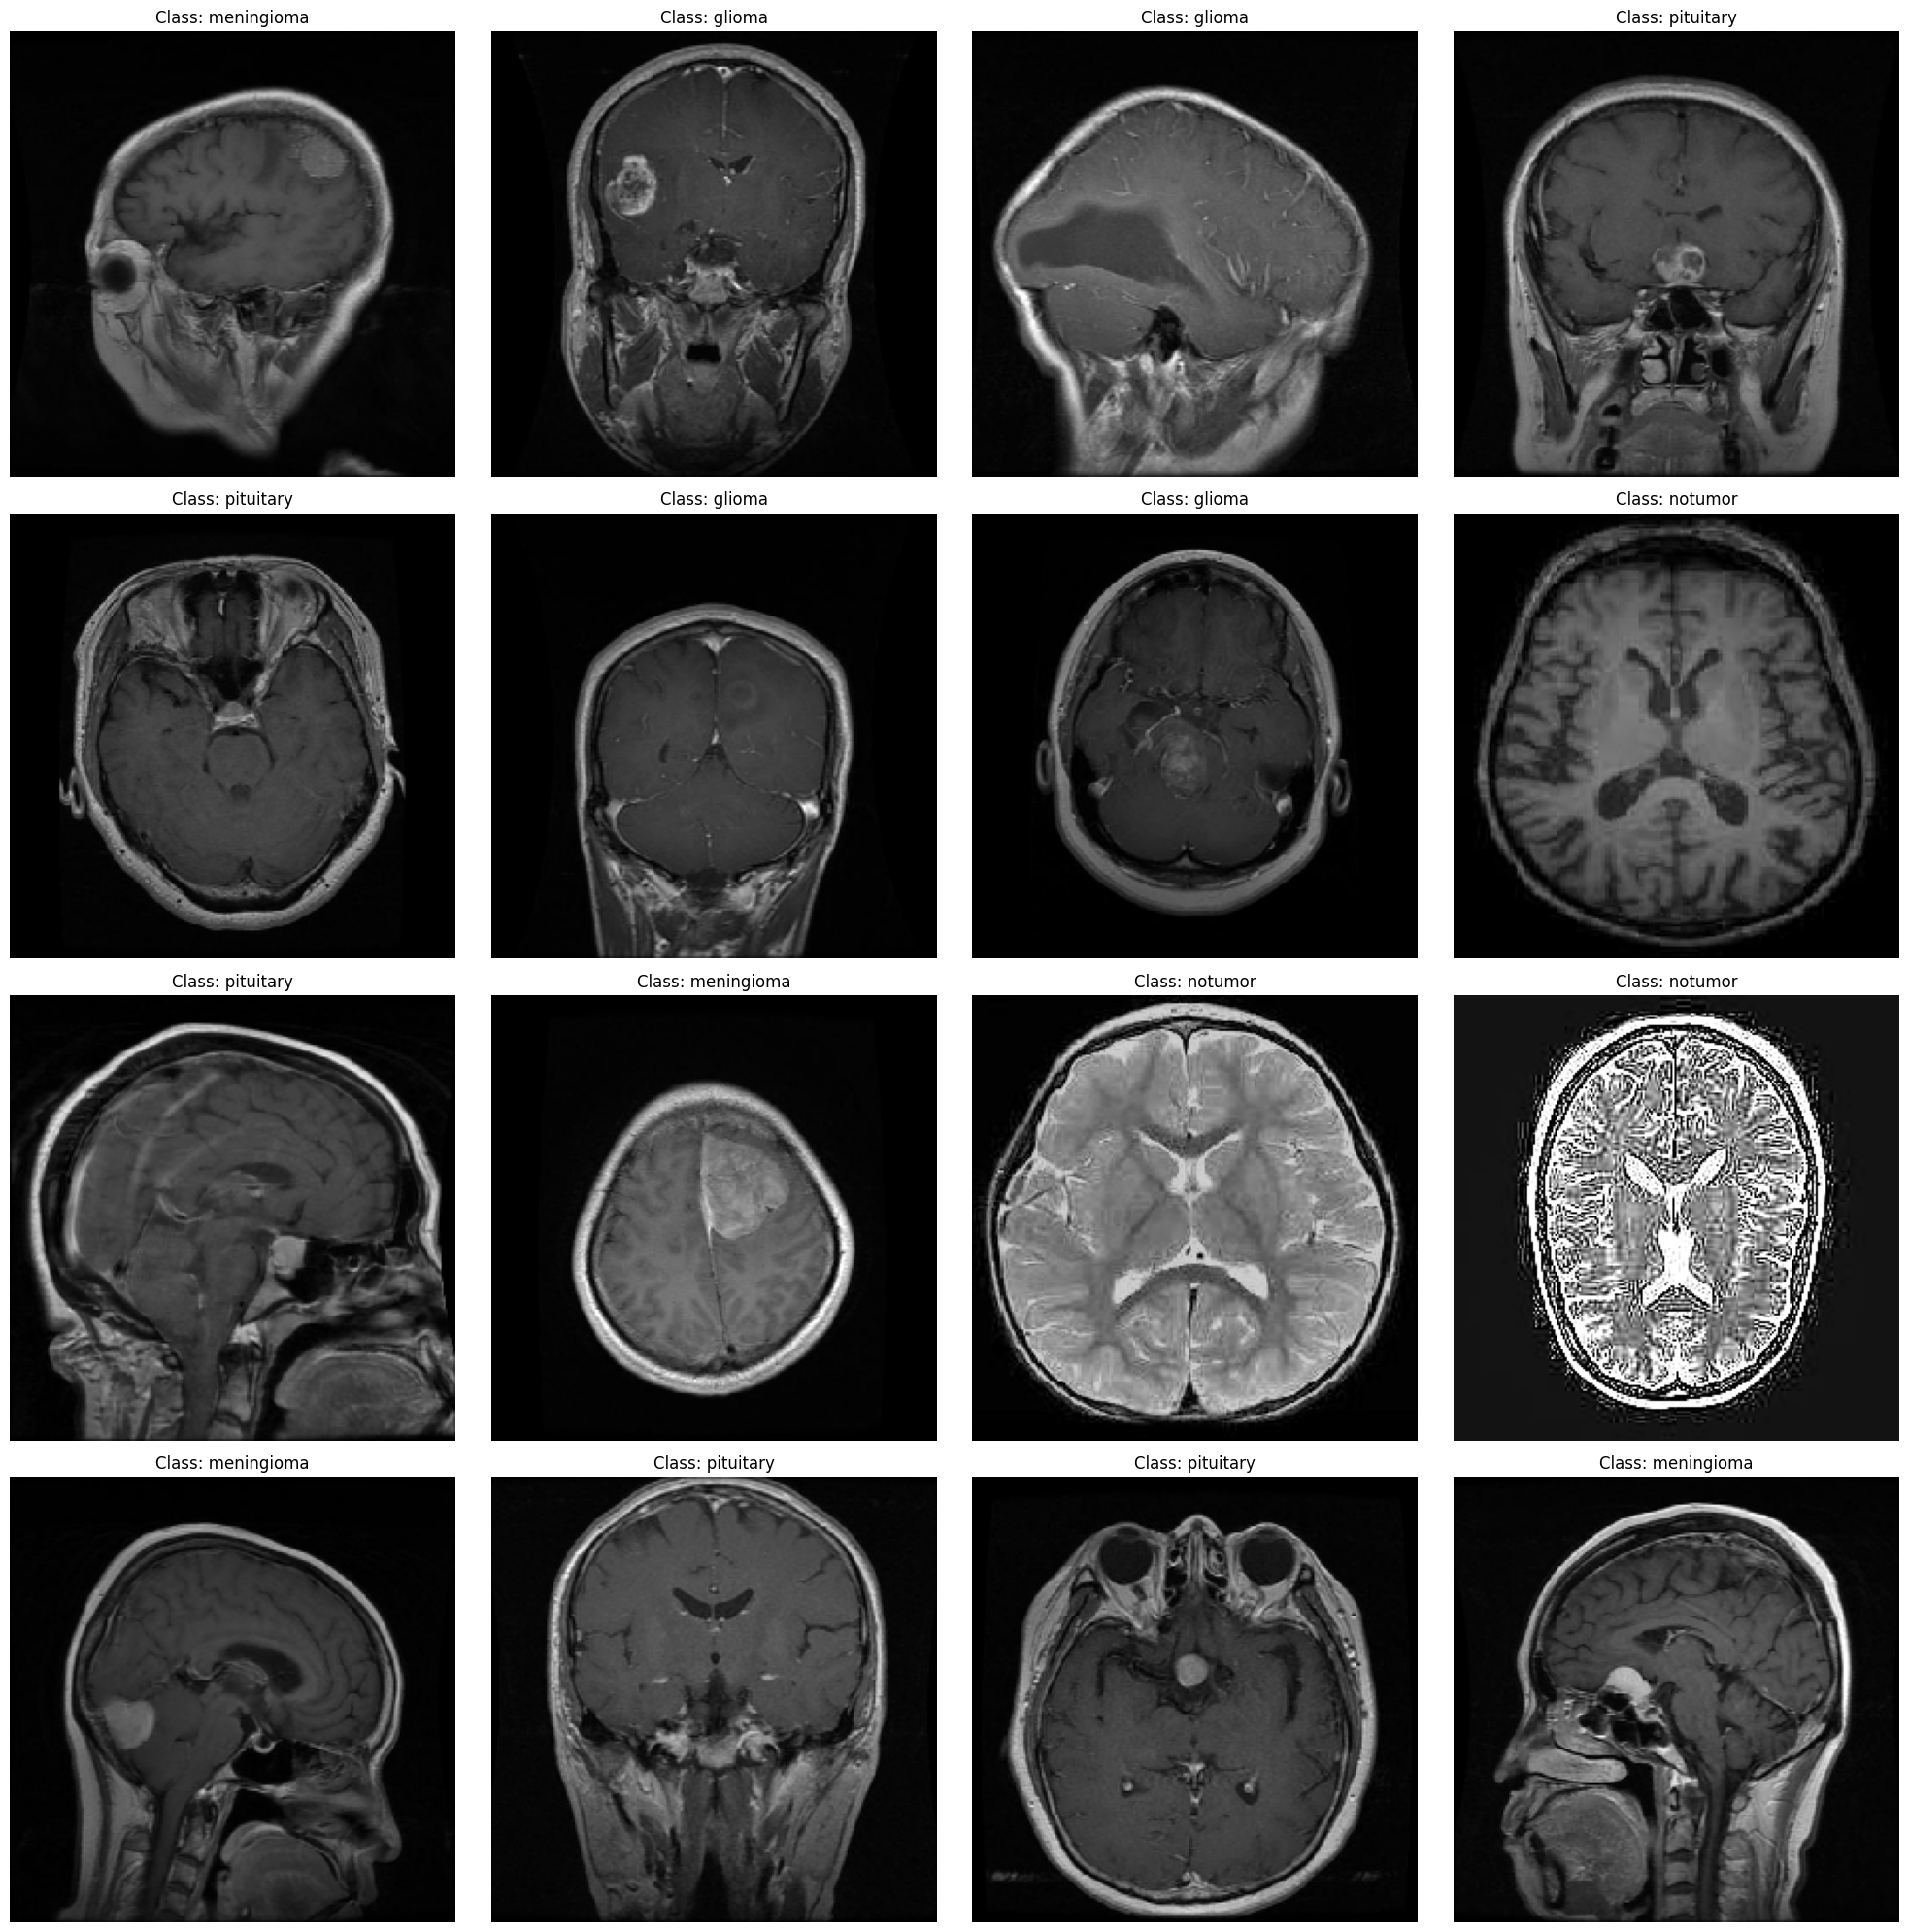

In [16]:
# Let's see some of the images from our dataset

plt.figure(figsize=(20, 20))
#This for loop iterates 16 times to create a 4 x 4 grid of images
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)# takes a "batch" of images and labels from the dataset generator(tr_gen)
  image = batch[0][0]# extracts the first image in the batch
  label = batch[1][0]# extracts the corresponding label(category info) for that image
  plt.imshow(image)# displays the image in the current subplot

  # Get the class index
  # gets the index of the highest value in the label array, indicating the class of the image.
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  # stores the names and indices of classes from the generator(tr_gen.class_indices)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  # finds the position of the image's class index in the class_indices list, so we can look up
  # the class name
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  # sets the title of each subplot to the class name and hides the axis for a cleaner look
  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [17]:
# The deep learning model that we're gonna be using to make predictions on what type of tumor is present in the MRI scans is the Xception Model(developed by François Chollet
# at Google). This is a type of convolutional neural network, which is a type deep learning model that is used for image recognition tasks
# This model works by breaking down the image into smaller, easier to understand parts, and then looks at those parts one by one. Just like if you were to focus on parts of
# an animal like the fur, eyes, or paws before deciding what animal you're looking at.

# 1. DATASET USED
# Xception was trained on ImageNet, a large and popular dataset in the computer vision community. ImageNet contains over 14 million images categorized into 1000 different
# categories. These images include everything from animals like dogs and cats to objects like cars, and plants. This dataset is believed to have sparked the deep learning
# revolution because it allowed for much more sophisticated models to be released that were trained on this dataset

# 2. TRAINING PROCESS
# The model was shown millions of images from the ImageNet dataset, and for each image, it was told what the object in the image was. Over time, Xception learned the patterns
# and features that distinguish different objects(like the stripes of a tiger, or the circular shape of a car's tire)
# The training process involves a lot of trial and error. In the beginning, the model might make mistakes, but after each mistake, it adjusts(or learns) a little bit to improve
# its accuracy. This is done using a process called BACKPROPAGATION and OPTIMIZATION techniques like STOCHASTIC GRADIENT DESCENT(SGD).

# A WALK THROUGH OF HOW OUR BRAIN TUMOR CLASSIFICATION MODEL WILL WORK

# First we start with an MRI scan of the brain(which is the input to our model). And this image goes to the xception model where it goes through a series of smart filters and
# pattern recognizers that extract important features from the image. These features can be different parts of the MRI scan, such as the brain tissue, the tumor, or other features.
# After the xception model does its work, we have a bunch of important information about the image, but the data is in the format of a multi-dimensional array often called a
# TENSOR. So this tensor contains all the high level features that the xception model extracted from the original image but we have to do one thing before we can use this
# information to make a prediction. We need to flatten this tensor into a 1D array. So this means we take all the information from the tensor and put it into a single list.
# Now comes the really interesting part, the flatten layer leads to a series of interconnected circles. These represent artificial neurons in our model. There are 128 of these
# artificial neurons in the first layer and each neuron takes in a flatenned list and tries to find patterns that might indicate a certain type of tumor. These artificial
# neurons are inspired by the way neurons work in the human brain. They take in information, process it and then pass it onto the next layer. So we as humans process info
# with the neurons in our brain and the same is true for these artificial neurons in our model. From 128 neurons, the information is passed onto four neurons in the second layer.
# we have four neurons in this second layer because we have four different types of tumors in our dataset. So each neuron takes in the information from the previous layer and
# tries to determine the probability that the image belongs to a certain class. So we have our output here, which is a list of probabilities for each type of tumor that we're
# looking for e.g [0.94, 0.03, 0.02, 0.01] predicted class: Glioma : Each add up to 100% and each number represents the model's confidence in its prediction for that particular
# type of tumor. Based on these probabilities, our model makes a prediction. In this case it's predicting that this MRI scan shows a glioma tumor with 94% confidence.

# This is a powerful tool that can assist doctors and neurosurgeons in making quick and accurate diagnosis. So, overall this process is called TRANSFER LEARNING where we are
# using a pre-trained model that was trained on a large dataset and adapting it for a task of classifying brain tumors. This xception model was trained on the ImageNet dataset,
# where it learned to classify various types of images but with this architecture that we have here, we're using it to classify brain tumors, particularly with the layers that
# are added to the end here containing the neurons also known as the DENSE LAYER that we will get into.


In [18]:
img_shape = (224, 224, 3) #RGB format (red, green, blue)

# Let's load in our Xception model:

base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')



# Now let's define our full model here called a sequential model.
# The dropout layers that you see are used to prevent overfitting. Overfitting is when the model learns the training data too well and it performs poorly on new and unseen data
# The dropout layer randomly drop some of the neurons in the model during training which helps the model generalize better to new data. These dense layers are used to take the
# output from the previous layer and transform it into the final predictions. The second layer has four neurons and it uses a softmax activation function which is commonly
# used in  classification tests. The last dense layer also has four neurons which are the number of classes in our dataset and typically the last dense layer should have the
# same number of neurons as the number of classes in your dataset. The "relu" activation function is a type of function that is commonly used in deep learning models. It's
# a simple function that helps the model learn non-linear relationships between the input and the output. And the softmax is a type of activation function that is commonly used
# in the last layer of a classification model. It takes the output from the previous layer and it transforms it into a probability distribution over the classes so the
# probabilities add up to a 100% with the highest probability being the predicted class for the model.
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation="relu"), # helps the model learn non-linear relationships btwn input and output
    Dropout(rate=0.25),
    Dense(4, activation="softmax") # it takes output from the previous layer and it transforms it into a probability distribution over the classes
])


In [19]:
# Now we need to compile the model which is last step and getting it ready for training.

# Adamax is like our smart assistant for our model during training. It helps the model learn by adjusting how big of steps it takes when it's updating its knowledge and the
# weights of the model. So, imagine that you're trying to find the lowest point in the hilly area while blindfolded. Adamax is like a guide that helps you decide how big your
# steps should be. If you're far from the lowest point in the hill, Adamax tells you to take bigger steps, as you get closer to te lowest point Adamax suggests smaller and
# more careful steps. It also remembers which direction you walked well before helping you move more efficiently. So this adaptive approach helps the model learn more
# effectively and often leads to much better results. In deep learning this optimizer is essentially trying to find the lowest loss for the model given a loss function. And
# this loss function is a difference betweent the predicted output and the actual output, so when the model is being trained, there's a loss calculated for each image in the
# dataset. The loss is equal to zero when the predicted output is exactly the same as the actual output and the loss is higher when the predicted output is different from the
# actual output. So this optimizer, tries to minimize the loss function so it adjusts the weights of the model to make the predicted output closer to the actual output. We
# set the learning rate to 0.01 which is a good starting point for most deep learning models and we use a categorical_crossentropy loss function which is commonly used in
# classification tasks. categorical_crossentropy is a measure of how much the predicted probabilities defer from the actual probabilities of each class in the dataset. It's
# commonly used in classification tasks because it penalizes the model more heavily for incorrect predictions, what helps the model learn to make better predictions as it is
# being trained. And we also want to track the accuracy, precision and recall of the model. Accuracy is a percentage of correct predictions  and precision is a percentage of
# true positives and the recall is a percentage of true positives that were correctly predicted.

# INTUITION BEHIND THE LEARNING RATE -> it's one of the most important parameters in training a deeplearning model.

# A low learning rate means that the model takes smaller steps when updating its weights. So it learns more slowly but more accurately. The high learning rate means that the
# model takes larger steps but it may not be as accurate. A big learning rate can also cause a model to overshoot the optimal weights and never converge on the best solution
# A low learning rate on the other hand can cause a model to converge on a good solution, but it may take a long time to do so. Now, training machine learning models or deeplearning
# models, can be quite expensive, because you might have to get a lot of GPUs to train the model and so the longer the model is being trained, the more cost is associated to
# that training run. So the key is to find a learning rate that allows the model to learn quickly and accurately.
model.compile(Adamax(learning_rate=0.001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy",
                         Precision(),
                         Recall()])

In [20]:
# HOW OUR MODEL ACTUALLY LEARNS AND IMPROVES ITS PREDICTIONS THROUGH THE TRAINING PROCESS:


# BrainScn -> ML model -> [0.50(men), 0.30(Gli), 0.10(pit), 0.10(NoTu)] -> categorical crossentropy loss = 0.69 -> (Model weights adjusted[Backpropagation]) ->

# BrainScn -> ML model -> [0.80(men), 0.10(Gli), 0.05(pit), 0.05(NoTu)] -> categorical crossentropy loss = 0.22


# We start with a brain MRI scan that we know contains the meningioma tumor. When we first show this image to our model, it makes a prediction in the form of probabilities
# for each class. So the model is predicting with 50% confidence that the MRI scan is a meningioma tumor with 30% confidence that it's a glioma tumor and 10% chance it's
# pituitary and 10% chance that there's no tumor at all. So while the model correctly gave the highest probability for meningioma, it's not very confident in its prediction
# and we want to improve this. Ideally we want this confidence level to be close to a 100% and this is where the categorical cross enthropy loss comes in. That is the loss
# function that we'll be using in our code and it helps us measure how wrong our prediction is. So it takes the probability of the correct class in this case 0.50 for
# meningioma and it calculates the negative log of that probability. And essentially, the higher this loss the worse our prediction is. In this case, our initial loss is 0.69
# Based on this loss our model will then adjust its weights(so think of this as a model fine tuning its understanding of what features indicate a meningioma tumor).
# So the model's weights are adjusted through a process called BACK PROPAGATION. And I would encourage you all to watch a separate video on that topic because it does quite
# get advanced. Afte adjusting the weights of the model, we then show the same MRI scan to the model and we get a new probability distribution. With this probability
# distribution, we see that the model has 80% confidence that the MRI scan contains a meningioma tumor, 10% glioma, 5% pituitary and 5% chance that there's no tumor at all.
# So the model is now much more confident in its prediction now than before. And this process of loss calculation and weight adjustment happens repeatedly during training
# and this gradually improves the model's ability to correctly identify different types of brain tumors. So this is similar to how a medical student might learn. They make
# their initial guesses, they receive feedback and they gradually improve their diagnostic abilities over time. This is the fundamental process that allows our deep learning
# model to learn and improve its predictions during the training process we discussed earlier.

In [21]:
# This is the part we now train our model:

# And we set the number of epochs to five, which means that the model will go through the entire training dataset 5 times and that means that the model will make five passes
# over the training data and for each pass it will update the model's weights based on the loss and metrics.

# The reason for using a GPU here is that it will speed up the training process significantly. Since we are training this model, which is already quite large, it will take a very
# long time to train the model if you're just using CPU and for a GPU this is the exact type of task that is optimized for training machine learning models and that's why we want
# to use a GPU to help speed up the process here.

hist = model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 113s 299ms/step - accuracy: 0.7385 - loss: 2.5818 - precision: 0.7558 - recall: 0.7192 - val_accuracy: 0.2595 - val_loss: 1.5644 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9279 - loss: 0.1963 - precision: 0.9435 - recall: 0.9117 - val_accuracy: 0.3053 - val_loss: 2.1010 - val_precision: 0.3138 - val_recall: 0.2947
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9663 - loss: 0.1082 - precision: 0.9711 - recall: 0.9607 - val_accuracy: 0.2992 - val_loss: 1.4728 - val_precision: 0.4240 - val_recall: 0.0809
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.9821 - loss: 0.0593 - precision: 0.9830 - recall: 0.9797 - val_accuracy: 0.5557 - val_loss: 1.2838 - val_precision: 0.6280 - val_recall: 0.4794
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.9818 - loss: 0.0615 - precision: 0.9831 - recall: 0.9797 - val_accuracy: 0.5695 -

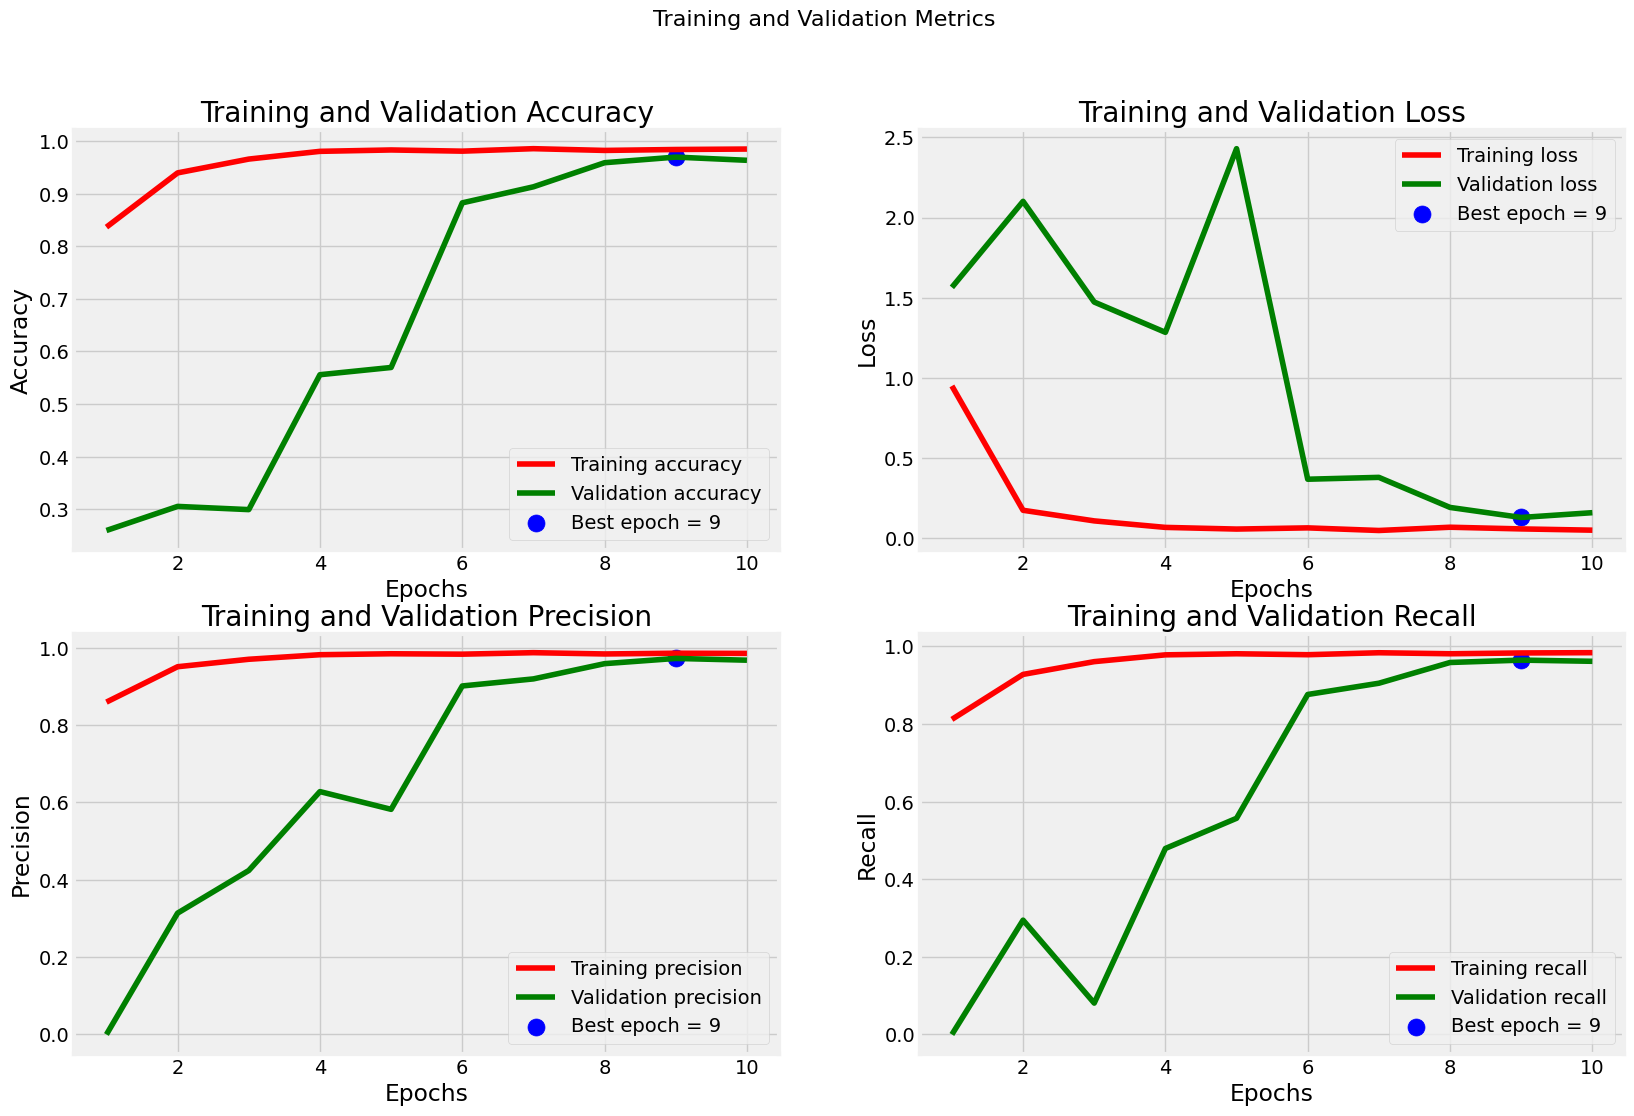

In [22]:
# Let's now plot some graphs to visualize the training metrics over the five epochs
# This is gonna help us understand what happened to the model during training

# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision", "recall"]  # Changed line
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}

# During which epoch did our model record the lowest loss
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use("fivethirtyeight")


for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], "r", label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], "g", label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c="blue", label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Training and Validation Metrics", fontsize=16)
plt.show()


# If the loss isn't decreasing over time, you should actually stop training the model and maybe do some feature engineering or more data argumentation if you're training
# images or to play around different architecture of the model.
# If the loss isn't decreasing over time that means your model isn't actually learning.

In [23]:
# Now, let's evaluate our model's performance on all our datasets Training, validation and Testing. This is a crucial step because it helps us understand how well our model
# generalizes to different data

# For each evaluation we set verbose=1 this means we'll see a progress bar and detailed metrics as the evaluation runs and the model will calculate all the metrics we specify
# during compilation e.g., accuracy, loss, precision, recall for each dataset

train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1) # This helps us learn if our model is overfitting or generalizing well because it didn't directly learn from this dataset.
# We're testing the model on a completely new and unseen data. This is the true measure of our model's performance is because it shows how well it can generalize to entirely
# new MRI scans that it hasn't seen before.
# This just shows us how the model will perform in a real world setting.
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.9871 - loss: 0.0360 - precision: 0.9880 - recall: 0.9869
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9751 - loss: 0.1093 - precision: 0.9763 - recall: 0.9749
 5/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9902 - loss: 0.0753 - precision: 0.9902 - recall: 0.9902

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9699 - loss: 0.1645 - precision: 0.9721 - recall: 0.9692
Train Accuracy: 98.48%
Train Loss: 0.0440


Validation Accuracy: 96.64%
Validation Loss: 0.1522


Test Accuracy: 96.19%
Test Loss: 0.1954


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


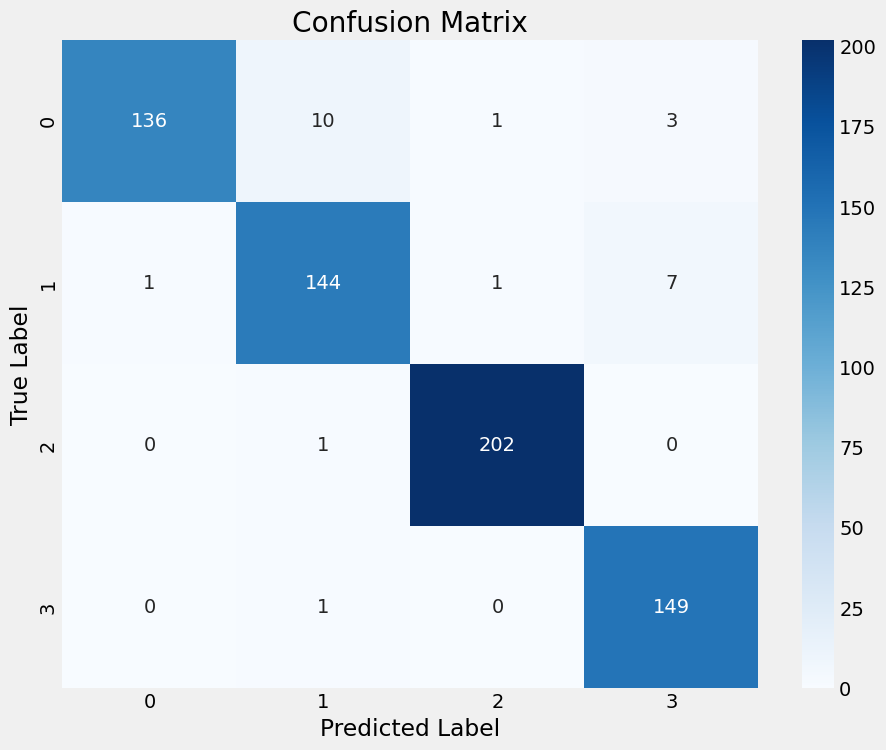

In [24]:
# Now let's visualize how well our model performs on each class in the dataset using a CONFUSION MATRIX...It shows us where our model succeeds and where it makes mistakes.
# outputs probability scores for each tumor class
preds = model.predict(ts_gen) # Runs predictions on ts_gen and Gives probabilities for each class for every test sample
y_pred = np.argmax(preds, axis=1) # Finds the class with the highest probability for each sample(converts probabilities into predicted class labels). The result is a list of
# predicted class labels.

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

# Then create and display the confusion matrix
# Each cell in cm shows how often a sample from one class was predicted as another class.
cm = confusion_matrix(ts_gen.classes, y_pred) # compares true labels from predicted labels
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
# Now let's define a function to visualize the predictions of our model on a few test images.

from PIL import Image

def predict(img_path:str) -> None:
  # Get the class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((224, 224))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0)/255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


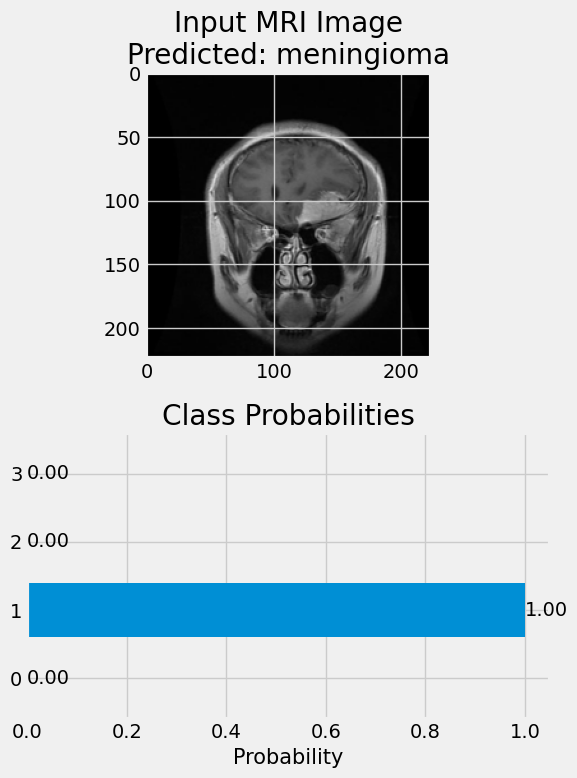


Predicted tumor type: meningioma


In [26]:
predict("/content/Training/meningioma/Tr-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


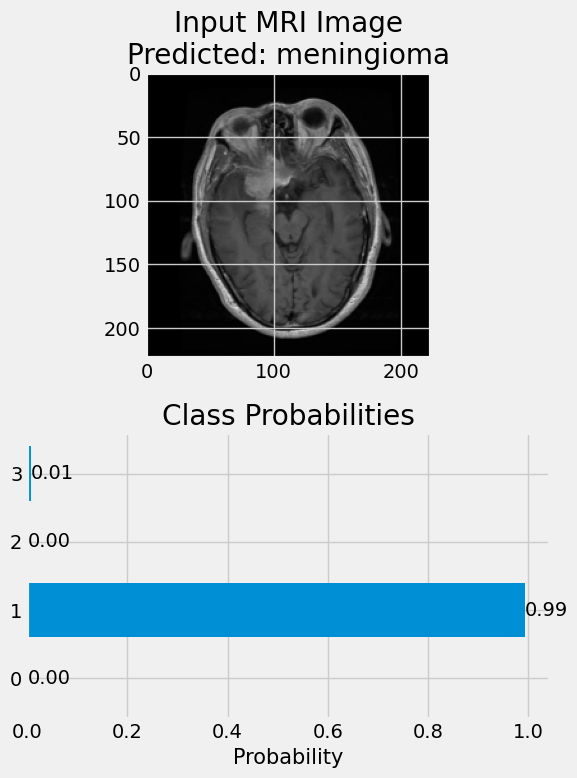


Predicted tumor type: meningioma


In [27]:
predict("/content/Training/meningioma/Tr-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


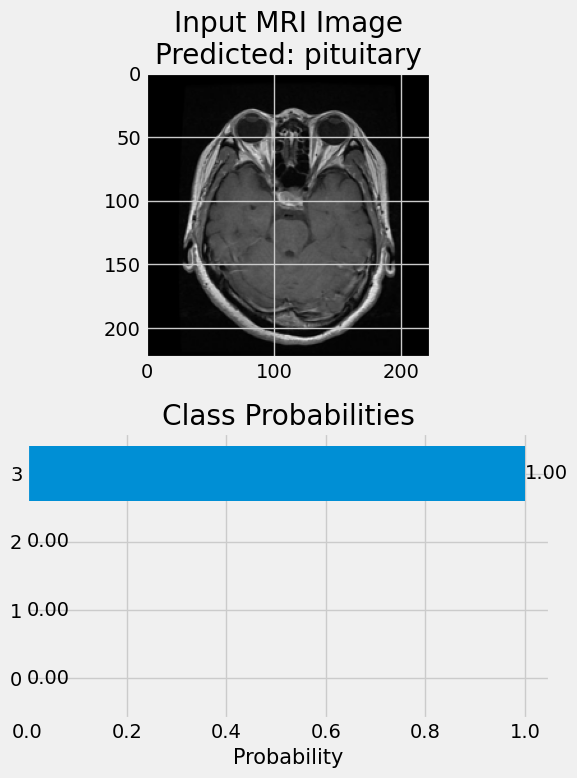


Predicted tumor type: pituitary


In [28]:
predict("/content/Training/pituitary/Tr-piTr_0000.jpg")

In [29]:
# Let's now save our model's weights for usage later on.

#model.save_weights("xception_model.weights.h5")
model.save_weights("Resnet_model.weights.h5")

In [30]:
# The type of model that we'll be training is called a Convolutional Neural Network or CNN for short. So CNNs are a type of deep learning model that are commonly used for
# image classification tasks and they're  called convolutional neural networks because they use a mathematical operation called convolution to analyze patterns in the images
# The xception model we used in this project is also a type of convolutional neural network. It actually contains 36 convolutional layers.
# Now the question is, can we train a smaller model with much fewer convolutional layers to achieve a similar level of accuracy to the xception model? This is an important
# question because training a smaller model will be less expensive to deploy in a real world setting because it would require less memory and computing power, meaning it can
# run on cheaper hardware and this is something very important to consider.

# DIFFERENCES BTWN XCEPTION MODEL AND CUSTOM CNN MODEL:

#   XCEPTION MODEL(research labs,
# wellfunded hospitals)                                CUSTOM CNN MODEL(clinics that are not funded)

# NVIDIA GPUs                                      ->   modest GPUs
# 36 convolutional layers                          ->   4 convolutional layers.
# 21 million parameters                            ->   4.7 million parameters
# 99% accuracy                                     ->   GOAL: Achieve 90+ % accuracy
# Limited to highend edge devices                  ->   Suitable for low-end edge devices
# Higher latency due to complexity                 ->   Low, suitable for real-time applications
# Higher serving costs, best in batch settings     ->   Cost-effective for single or batch infer

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [32]:
# We're reducing the batch size and image size basically because we are going to be using smaller memory.

# PRE-PROCESSING THE DATA

# In order to pre-process our data we first need to set up some basic parameters.

# 1. Batch size -> number of images the model will process at once
batch_size = 16 # Lower batch size means fewer number of images that are processed simultaneously

# 2. Resizing the images to a similar size so that it doesn't throw away our model.
img_size = (128, 128)

# 3. Rescaling the pixels from 0 -> 255 to 0 -> 1(so this helps our model learn better) and also randomly adjusts the brightness of the images which helps our model be more
    # robust and generalize better to new data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

# 4. For the testing data, we only rescale the pixel values without changing their brightness. This is because, for testing we want to make sure our dataset is consistent
    # and not randomly adjust the brightness so that it's all consistent and the model is able to effectively generalize to learn how to act, how to properly predict
    # the testing data.
ts_gen = ImageDataGenerator(rescale=1/255)



# We can use these generators to create three data flows: One for training, one for validation and one for testing.
# So these flows will take our image data from the dataframes and prepare them to be fed to our deep learning model

# Here, this code takes our training dataframe and it creates a flow of images from the dataframe
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                            x_col = "Class Path",
                                            y_col = "Class",
                                            target_size = img_size,
                                            batch_size = batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col = "Class Path",
                                                y_col = "Class",
                                                target_size = img_size,
                                                batch_size = batch_size)

# For the testing flow we use slightly smaller batch size of 16 and we're telling it not to shuffle the data. This is because for testing we want to keep the order of our
# data consistent.

# So this whole process is preparing our image data so it's in the right format and size to be fed to our deep learning model so that it can accurately learn and then make
# predictions.
ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col = "Class Path",
                                    y_col = "Class",
                                    target_size = img_size,
                                    batch_size = 16,
                                    shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [33]:
# CNN MODEL ARCHITECTURE

# Create a Sequential model

cnn_model = Sequential() # This is also a sequential model because we're stacking layers on top of each other to build our model.

# convolutional layers
# Each has different amount of convolutional filters 512 -> 256 -> 128 -> 64
# These filters are used to extract features from the input images and this features can range from simple things like edges or more complex features like shapes or even
# textures
# MaxPooling layer: It reduces the spatial dimensions of the data, making the model more computationally efficient and it also helps the model become more robust by focusing
# on only the most prominent features and disregarding the less important details in the image. This also helps control overfitting because it reduces the number of parameters
# in the model.
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(128, 128, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten()) # This is like taking all the filtered images and laying them in one line.

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics= ['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary() # it has 4.7 parameters which makes it work in a less powerful hardware.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 256)         │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,612,932 (9.97 MB)

 Trainable params: 2,612,932 (9.97 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Let's now train our model:

history = cnn_model.fit(tr_gen, epochs=15, validation_data=valid_gen)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.5497 - loss: 2.7090 - precision_1: 0.6920 - recall_1: 0.3480 - val_accuracy: 0.7389 - val_loss: 1.0147 - val_precision_1: 0.7731 - val_recall_1: 0.6763
Epoch 2/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7985 - loss: 0.8406 - precision_1: 0.8247 - recall_1: 0.7779 - val_accuracy: 0.7511 - val_loss: 0.7879 - val_precision_1: 0.7732 - val_recall_1: 0.7237
Epoch 3/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8383 - loss: 0.6298 - precision_1: 0.8486 - recall_1: 0.8177 - val_accuracy: 0.7954 - val_loss: 0.6582 - val_precision_1: 0.8128 - val_recall_1: 0.7756
Epoch 4/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.8615 - loss: 0.5157 - precision_1: 0.8716 - recall_1: 0.8462 - val_accuracy: 0.8366 - val_loss: 0.5360 - val_precision_1: 0.8425 - val_recall_1: 0.8168
Epoch 5/15
357/357 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.8931 - loss: 0.4293 - precision_1: 0.9026 - recall_1: 0.8840 - 

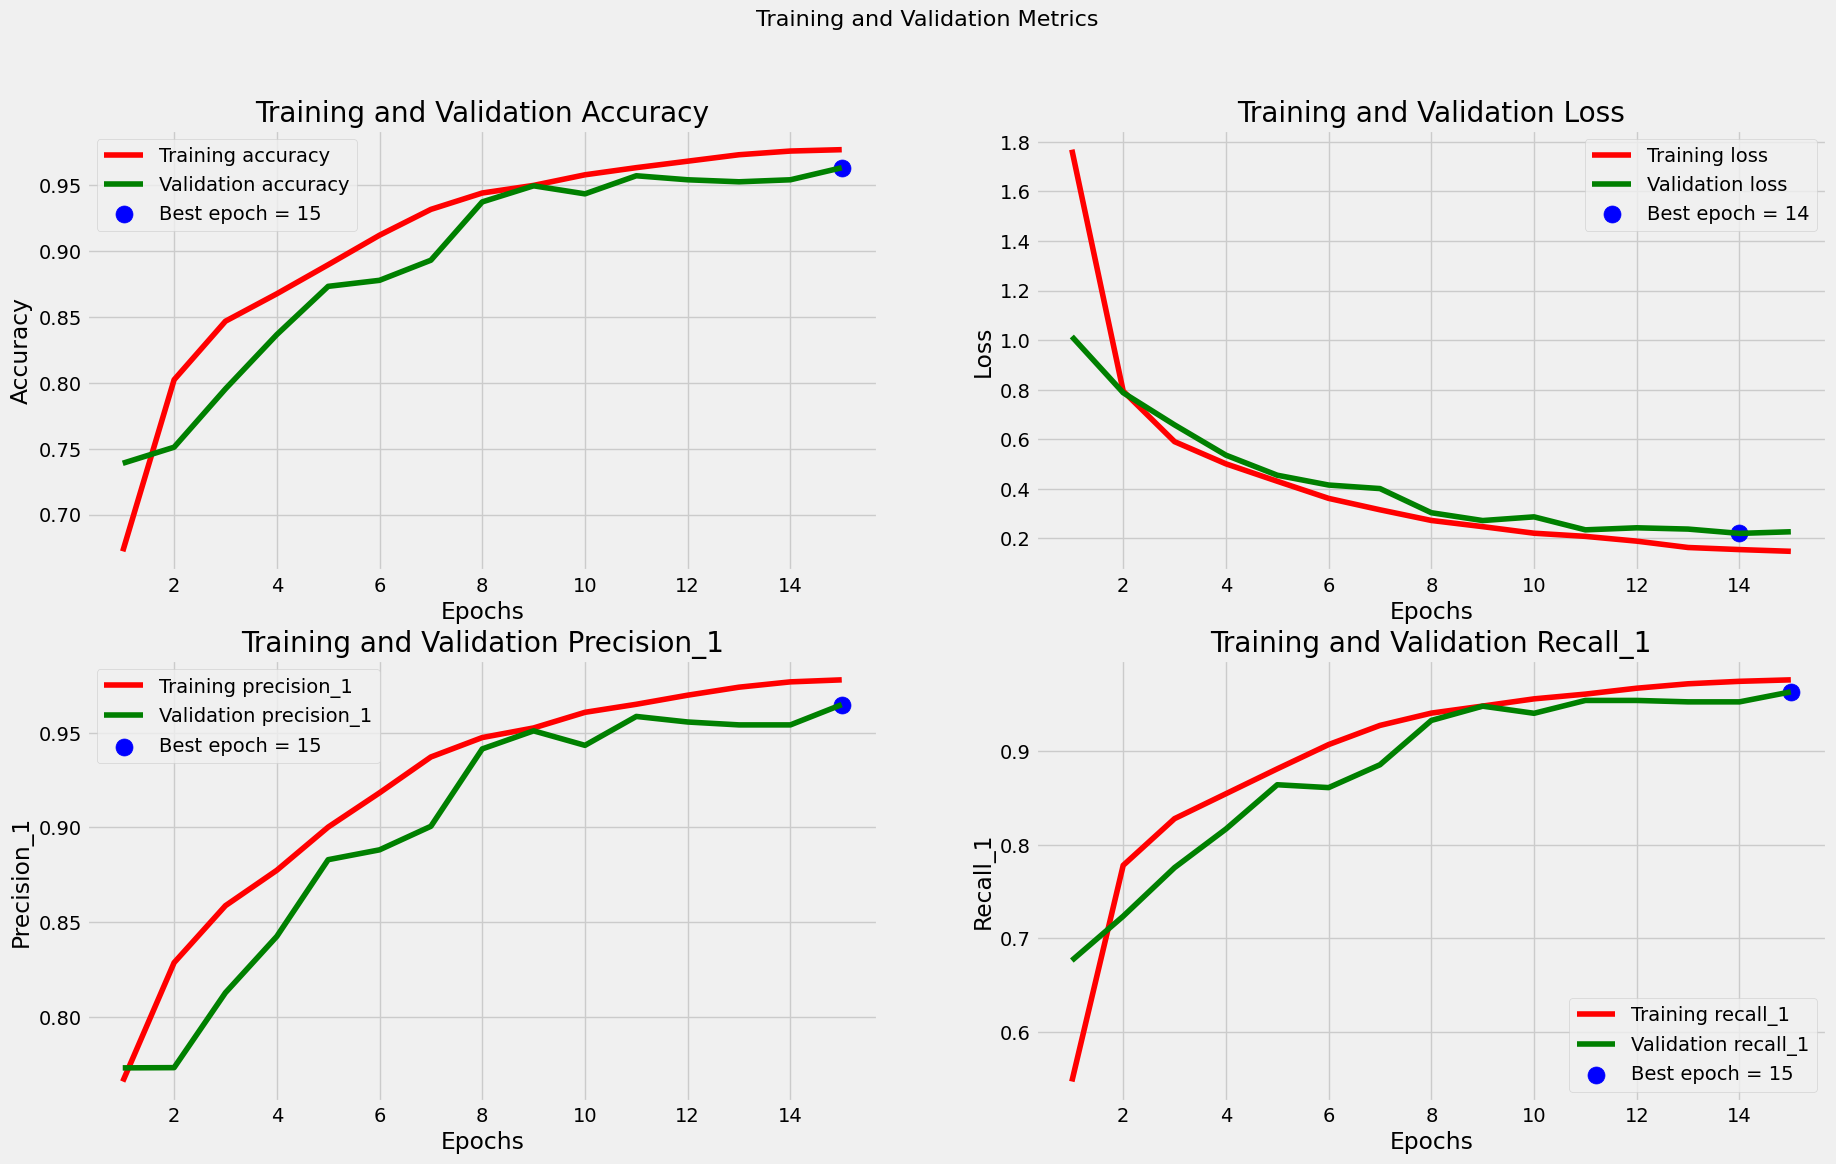

In [35]:
# Let's now plot some graphs to visualize the training metrics over the five epochs
# This is gonna help us understand what happened to the model during training

# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision_1", "recall_1"]
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f"val_{m}"] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}

# During which epoch did our model record the lowest loss
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use("fivethirtyeight")


for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], "r", label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], "g", label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c="blue", label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Training and Validation Metrics", fontsize=16)
plt.show()


# If the loss isn't decreasing over time, you should actually stop training the model and maybe do some feature engineering or more data argumentation if you're training
# images or to play around different architecture of the model.
# If the loss isn't decreasing over time that means your model isn't actually learning.

In [36]:
# Now, let's evaluate our model's performance on all our datasets Training, validation and Testing. This is a crucial step because it helps us understand how well our model
# generalizes to different data

# For each evaluation we set verbose=1 this means we'll see a progress bar and detailed metrics as the evaluation runs and the model will calculate all the metrics we specify
# during compilation e.g., accuracy, loss, precision, recall for each dataset

train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1) # This helps us learn if our model is overfitting or generalizing well because it didn't directly learn from this dataset.
# We're testing the model on a completely new and unseen data. This is the true measure of our model's performance is because it shows how well it can generalize to entirely
# new MRI scans that it hasn't seen before.
# This just shows us how the model will perform in a real world setting.
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.9949 - loss: 0.1102 - precision_1: 0.9949 - recall_1: 0.9947
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9580 - loss: 0.2384 - precision_1: 0.9580 - recall_1: 0.9580
 7/41 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9817 - loss: 0.2122 - precision_1: 0.9817 - recall_1: 0.9817

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9780 - loss: 0.1858 - precision_1: 0.9782 - recall_1: 0.9780
Train Accuracy: 99.37%
Train Loss: 0.1105


Validation Accuracy: 96.34%
Validation Loss: 0.2303


Test Accuracy: 97.56%
Test Loss: 0.1717


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


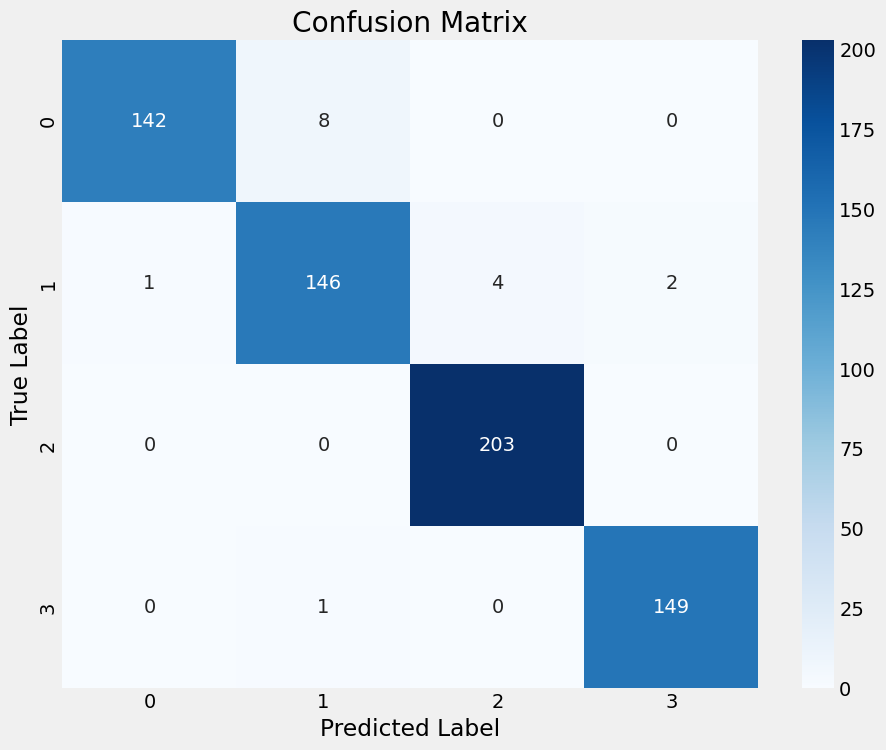

In [37]:
# Now let's visualize how well our model performs on each class in the dataset using a CONFUSION MATRIX...It shows us where our model succeeds and where it makes mistakes.
# outputs probability scores for each tumor class
preds = cnn_model.predict(ts_gen) # Runs predictions on ts_gen and Gives probabilities for each class for every test sample
y_pred = np.argmax(preds, axis=1) # Finds the class with the highest probability for each sample(converts probabilities into predicted class labels). The result is a list of
# predicted class labels.

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

# Then create and display the confusion matrix
# Each cell in cm shows how often a sample from one class was predicted as another class.
cm = confusion_matrix(ts_gen.classes, y_pred) # compares true labels from predicted labels
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Let's print out the classification report of our model.

clr = classification_report(ts_gen.classes, y_pred) # True classes Vs Predicted classes
print(clr)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       150
           1       0.94      0.95      0.95       153
           2       0.98      1.00      0.99       203
           3       0.99      0.99      0.99       150

    accuracy                           0.98       656
   macro avg       0.98      0.97      0.97       656
weighted avg       0.98      0.98      0.98       656



In [39]:
cnn_model.save("cnn_model.h5")

In [40]:
# 1. Batch size -> number of images the model will process at once
batch_size = 32

# 2. Resizing the images to a similar size so that it doesn't throw away our model.
img_size = (299, 299)

# 3. Rescaling the pixels from 0 -> 255 to 0 -> 1(so this helps our model learn better) and also randomly adjusts the brightness of the images which helps our model be more
    # robust and generalize better to new data
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))


# 4. For the testing data, we only rescale the pixel values without changing their brightness. This is because, for testing we want to make sure our dataset is consistent
    # and not randomly adjust the brightness so that it's all consistent and the model is able to effectively generalize to learn how to act, how to properly predict
    # the testing data.
ts_gen = ImageDataGenerator(rescale=1/255)

In [41]:
# We can use these generators to create three data flows: One for training, one for validation and one for testing.
# So these flows will take our image data from the dataframes and prepare them to be fed to our deep learning model

# Here, this code takes our training dataframe and it creates a flow of images from the dataframe
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                            x_col = "Class Path",
                                            y_col = "Class",
                                            target_size = img_size,
                                            batch_size = batch_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                                x_col = "Class Path",
                                                y_col = "Class",
                                                target_size = img_size,
                                                batch_size = batch_size)

# For the testing flow we use slightly smaller batch size of 16 and we're telling it not to shuffle the data. This is because for testing we want to keep the order of our
# data consistent.

# So this whole process is preparing our image data so it's in the right format and size to be fed to our deep learning model so that it can accurately learn and then make
# predictions.
ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                    x_col = "Class Path",
                                    y_col = "Class",
                                    target_size = img_size,
                                    batch_size = 16,
                                    shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


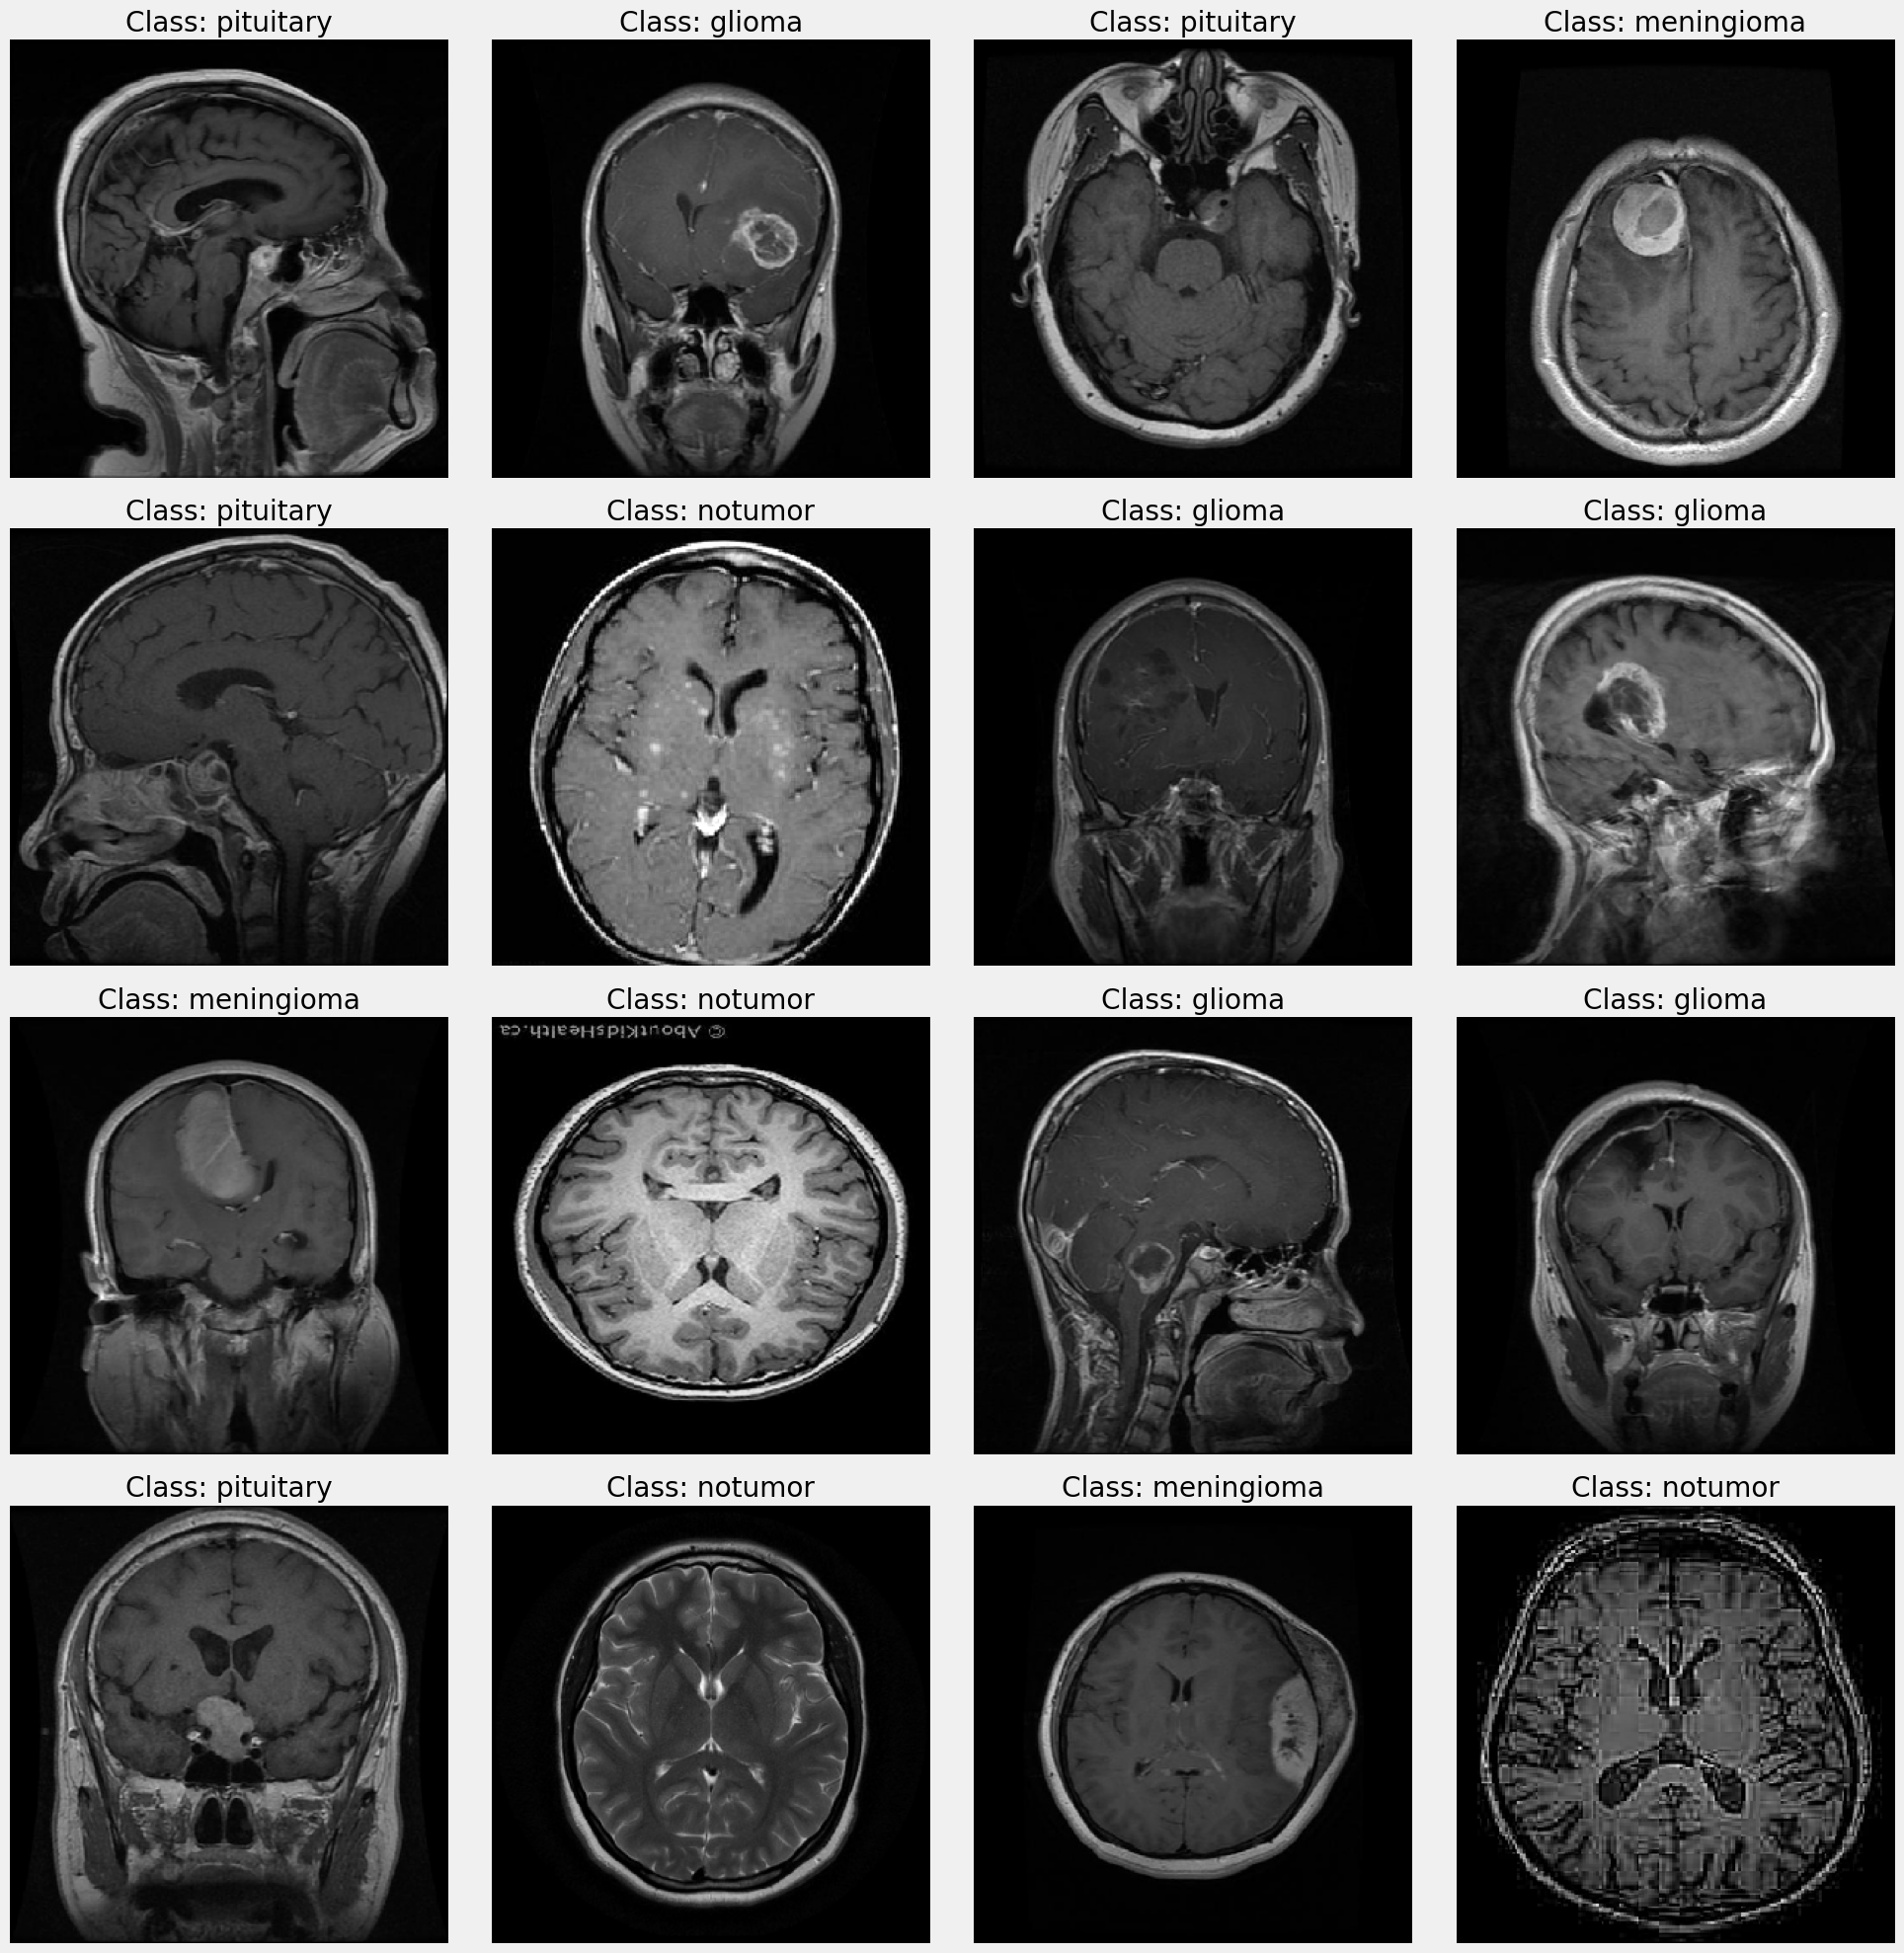

In [42]:
# Let's see some of the images from our dataset

plt.figure(figsize=(20, 20))
#This for loop iterates 16 times to create a 4 x 4 grid of images
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)# takes a "batch" of images and labels from the dataset generator(tr_gen)
  image = batch[0][0]# extracts the first image in the batch
  label = batch[1][0]# extracts the corresponding label(category info) for that image
  plt.imshow(image)# displays the image in the current subplot

  # Get the class index
  # gets the index of the highest value in the label array, indicating the class of the image.
  class_index = np.argmax(label)

  # Get the list of class names and class indices
  # stores the names and indices of classes from the generator(tr_gen.class_indices)
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  # finds the position of the image's class index in the class_indices list, so we can look up
  # the class name
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  # sets the title of each subplot to the class name and hides the axis for a cleaner look
  plt.title(f"Class: {class_name}")
  plt.axis("off")

plt.tight_layout()
plt.show()

In [43]:
img_shape = (299, 299, 3) #RGB format (red, green, blue)

# Let's load in our Xception model:

base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=img_shape, pooling='max')



# Now let's define our full model here called a sequential model.
# The dropout layers that you see are used to prevent overfitting. Overfitting is when the model learns the training data too well and it performs poorly on new and unseen data
# The dropout layer randomly drop some of the neurons in the model during training which helps the model generalize better to new data. These dense layers are used to take the
# output from the previous layer and transform it into the final predictions. The second layer has four neurons and it uses a softmax activation function which is commonly
# used in  classification tests. The last dense layer also has four neurons which are the number of classes in our dataset and typically the last dense layer should have the
# same number of neurons as the number of classes in your dataset. The "relu" activation function is a type of function that is commonly used in deep learning models. It's
# a simple function that helps the model learn non-linear relationships between the input and the output. And the softmax is a type of activation function that is commonly used
# in the last layer of a classification model. It takes the output from the previous layer and it transforms it into a probability distribution over the classes so the
# probabilities add up to a 100% with the highest probability being the predicted class for the model.
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation="relu"), # helps the model learn non-linear relationships btwn input and output
    Dropout(rate=0.25),
    Dense(4, activation="softmax") # it takes output from the previous layer and it transforms it into a probability distribution over the classes
])

In [44]:
model.compile(Adamax(learning_rate=0.001),
              loss = "categorical_crossentropy",
              metrics = ["accuracy",
                         Precision(),
                         Recall()])

In [45]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 315ms/step - accuracy: 0.6942 - loss: 0.9238 - precision_2: 0.7795 - recall_2: 0.5159 - val_accuracy: 0.9450 - val_loss: 0.1481 - val_precision_2: 0.9530 - val_recall_2: 0.9282
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9649 - loss: 0.1032 - precision_2: 0.9679 - recall_2: 0.9615 - val_accuracy: 0.9511 - val_loss: 0.1481 - val_precision_2: 0.9525 - val_recall_2: 0.9481
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9885 - loss: 0.0346 - precision_2: 0.9889 - recall_2: 0.9876 - val_accuracy: 0.9740 - val_loss: 0.0735 - val_precision_2: 0.9740 - val_recall_2: 0.9740
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 161ms/step - accuracy: 0.9949 - loss: 0.0179 - precision_2: 0.9951 - recall_2: 0.9947 - val_accuracy: 0.9496 - val_loss: 0.2542 - val_precision_2: 0.9509 - val_recall_2: 0.9466
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 160ms/step - accuracy: 0.9901 - loss: 0.0393 - precision_2: 0.9901 - recall_2: 0.9889 

In [46]:
# Let's now plot some graphs to visualize the training metrics over the five epochs
# This is gonna help us understand what happened to the model during training

# Get training and validation metrics from history
metrics = ["accuracy", "loss", "precision", "recall"]  # Changed line
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f"val_{m}"] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}

# During which epoch did our model record the lowest loss
for m in metrics:
  if m == "loss":
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]


# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use("fivethirtyeight")


for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], "r", label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], "g", label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c="blue", label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f"Training and Validation {metric.title()}")
  plt.xlabel("Epochs")
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle("Training and Validation Metrics", fontsize=16)
plt.show()


# If the loss isn't decreasing over time, you should actually stop training the model and maybe do some feature engineering or more data argumentation if you're training
# images or to play around different architecture of the model.
# If the loss isn't decreasing over time that means your model isn't actually learning.

KeyError: 'precision'

In [47]:
# Now, let's evaluate our model's performance on all our datasets Training, validation and Testing. This is a crucial step because it helps us understand how well our model
# generalizes to different data

# For each evaluation we set verbose=1 this means we'll see a progress bar and detailed metrics as the evaluation runs and the model will calculate all the metrics we specify
# during compilation e.g., accuracy, loss, precision, recall for each dataset

train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1) # This helps us learn if our model is overfitting or generalizing well because it didn't directly learn from this dataset.
# We're testing the model on a completely new and unseen data. This is the true measure of our model's performance is because it shows how well it can generalize to entirely
# new MRI scans that it hasn't seen before.
# This just shows us how the model will perform in a real world setting.
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.9909 - loss: 0.0303 - precision_2: 0.9909 - recall_2: 0.9909
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.9649 - loss: 0.1333 - precision_2: 0.9649 - recall_2: 0.9649
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9814 - loss: 0.0719 - precision_2: 0.9819 - recall_2: 0.9814
Train Accuracy: 98.93%
Train Loss: 0.0358


Validation Accuracy: 96.79%
Validation Loss: 0.1340


Test Accuracy: 97.26%
Test Loss: 0.1071


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step


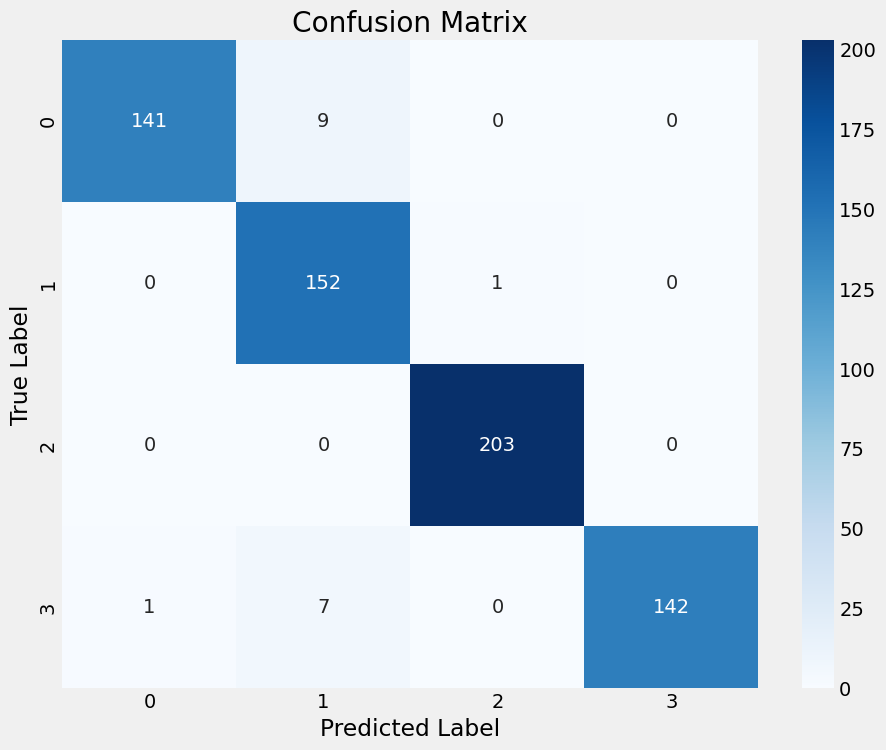

In [48]:
# Now let's visualize how well our model performs on each class in the dataset using a CONFUSION MATRIX...It shows us where our model succeeds and where it makes mistakes.
# outputs probability scores for each tumor class
preds = model.predict(ts_gen) # Runs predictions on ts_gen and Gives probabilities for each class for every test sample
y_pred = np.argmax(preds, axis=1) # Finds the class with the highest probability for each sample(converts probabilities into predicted class labels). The result is a list of
# predicted class labels.

class_dict = {
    0: "glioma",
    1: "meningioma",
    2: "no_tumor",
    3: "pituitary"
}

# Then create and display the confusion matrix
# Each cell in cm shows how often a sample from one class was predicted as another class.
cm = confusion_matrix(ts_gen.classes, y_pred) # compares true labels from predicted labels
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Now let's define a function to visualize the predictions of our model on a few test images.

from PIL import Image

def predict(img_path:str) -> None:
  # Get the class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6, 8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0)/255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


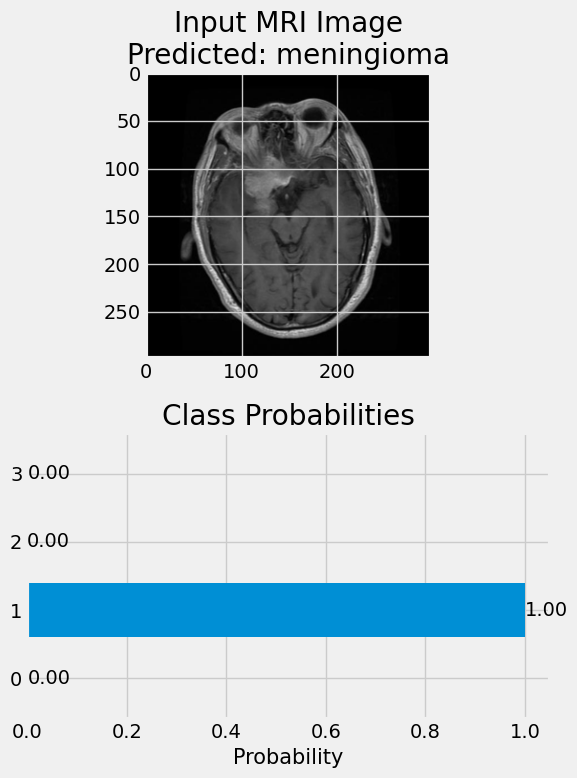


Predicted tumor type: meningioma


In [50]:
predict("/content/Training/meningioma/Tr-meTr_0005.jpg")

In [51]:
model.save_weights("xception_model.weights.h5")

In [52]:
! pip install streamlit pyngrok python-dotenv

In [53]:
!pip install llama-index > /dev/null

In [54]:
! pip install mistralai

In [55]:
!pip install llama-index > /dev/null

In [102]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [103]:
ngrok_token = userdata.get("NGROK_AUTH_TOKEN")

ngrok.set_auth_token(ngrok_token)

In [104]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [112]:
# This piece of code saves the file in google colab
%%writefile app.py

from llama_index.indices.managed.llama_cloud import LlamaCloudIndex
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
import plotly.graph_objects as go

load_dotenv()

# Let's set up our genai library so that we can use the gemini LLM model
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = "saliency_maps"
os.makedirs(output_dir, exist_ok=True)

# Add a dropdown to select the multimodal LLM
selected_llm = st.radio(
    "Select Multimodal LLM for Explanation",
    ("Gemini 1.5 Flash", "Llama Vision", "Pixtral")
)
# Import necessary libraries
import streamlit as st
from groq import Groq

# Modular LLM handlers
def gemini_generate(prompt, img_path):
    from google.generativeai import GenerativeModel
    model = GenerativeModel(model_name="gemini-1.5-flash")
    response = model.generate_content([prompt, PIL.Image.open(img_path)])
    return response.text


def llama_vision_generate(prompt):
    from groq import Groq
    client = Groq(api_key=os.getenv("GROQ_API"))
    completion = client.chat.completions.create(
        model="llama-3.2-11b-text-preview",
        messages=[{"role": "user", "content": prompt}],
        temperature=1,
        max_tokens=2048,
        top_p=1,
        stream=False,
        stop=None,
    )
    return completion.choices[0].message.content


def pixtral_generate(prompt):
    from mistralai import Mistral
    api_key = "PISTRAL_API"
    model = "mistral-large-latest"
    client = Mistral(api_key=api_key)
    chat_response = client.chat.complete(
        model=model,
        messages=[{"role": "user", "content": prompt}]
    )
    return chat_response.choices[0].message.content

def generate_comprehensive_report(llm_choice, img_path, prediction, confidence):
    # Define the report prompt
    report_prompt = f"""
    You are an expert neurologist and AI specialist tasked with providing a comprehensive report on a brain tumor MRI scan.
    The MRI scan has been analyzed by a deep learning model trained to classify brain tumors into the following categories:
    glioma, meningioma, pituitary, or no tumor.

    The model has made the following prediction:
    - Predicted Class: '{prediction}'
    - Confidence Level: {confidence * 100:.2f}%

    In your report:
    1. Provide a detailed explanation of the model's prediction.
    2. Compare this prediction with historical cases of similar MRI scans and outline any significant similarities or differences.
    3. Suggest potential next steps for patients and doctors, including further diagnostic procedures or treatment options.

    The report should be written in a clear and professional tone, suitable for medical professionals.
    """

    if llm_choice == "Gemini 1.5 Flash":
        return gemini_generate(report_prompt, img_path)

    elif llm_choice == "Llama Vision":
        return llama_vision_generate(report_prompt)

    elif llm_choice == "Pixtral":
        return pixtral_generate(report_prompt)

    else:
        raise ValueError("Unsupported LLM selected!")


# Chat functionality for asking questions about the image
def chat_with_image(llm_choice, question, img_path, prediction, confidence):
    # Define a chat prompt
    prompt = f"""You are an expert neurologist. You are tasked with answering questions about a brain tumor MRI scan.
                The MRI scan has been analyzed by a deep learning model trained to classify brain tumors into the
                following categories: glioma, meningioma, pituitary, or no tumor.

                The model predicted the image to be of the class '{prediction}' with a confidence of {confidence * 100}%.

                Use the information about the saliency map, which highlights regions of focus, to answer the question:
                {question}"""

    if llm_choice == "Gemini 1.5 Flash":
        return gemini_generate(prompt, img_path)

    elif llm_choice == "Llama Vision":
        return llama_vision_generate(prompt)

    elif llm_choice == "Pixtral":
        return pixtral_generate(prompt)

    else:
        raise ValueError("Unsupported LLM selected!")




def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())

  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 90)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhanced contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match the original image size
  heatmap = cv2.resize(heatmap, img_size)

  # Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, 'wb') as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img



def load_Resnet_model(model_path):
  img_shape=(224,224,3)
  base_model = tf.keras.applications.ResNet50(
              include_top=False,
              weights="imagenet",
              input_shape=img_shape,
              pooling="max")

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # compile teh model
  model.compile(Adamax(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


def load_Xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(
              include_top=False,
              weights="imagenet",
              input_shape=img_shape,
              pooling="max")

  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate=0.3),
      Dense(128, activation='relu'),
      Dropout(rate=0.25),
      Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # compile teh model
  model.compile(Adamax(learning_rate=0.001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy',
                         Precision(),
                         Recall()])

  model.load_weights(model_path)

  return model


st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify the tumor.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    selected_model = st.radio(
        "Select Model",
        ("Transfer Learning - Resnet", "Transfer Learning - Xception", "Custom CNN")
    )


    if selected_model == "Transfer Learning - Resnet":
      model = load_Resnet_model("/content/Resnet_model.weights.h5")
      img_size = (224, 224)
    elif selected_model == "Transfer Learning - Xception":
      model = load_Xception_model("/content/xception_model.weights.h5")
      img_size = (299, 299)
    else:
      model = load_model("/content/cnn_model.h5")
      img_size = (128, 128)


    labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
    img = image.load_img(uploaded_file, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255. # we normalize it so that the image pixels are between 0 and 1 because that's how the models were trained.

    prediction = model.predict(img_array)

    # Get the class with the highest probability
    class_index = np.argmax(prediction[0])
    result = labels[class_index]

    st.write(f'Predicted Class: {result}')
    st.write("Predictions:")
    for label, prob in zip(labels, prediction[0]):
        st.write(f"{label}: {prob:.2f}")


    saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

    col1, col2 = st.columns(2)
    with col1:
      st.image(uploaded_file, caption='Uploaded Image', use_container_width=True)
    with col2:
      st.image(saliency_map, caption='Saliency Map', use_container_width=True)


    st.write("## Classification Results")

    result_container = st.container()
    result_container = st.container()
    result_container.markdown(
        f"""
        <div style="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
            <div style="display: flex; justify-content: space-between; align-items: center;">
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Predictions</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
                      {result}
                    </p>
                </div>
                <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0.20px;"></div>
                <div style="flex: 1; text-align: center;">
                    <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
                    <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
                      {prediction[0][class_index]:.4%}
                    </p>
                </div>
            </div>
        </div>""",
        unsafe_allow_html=True
    )

    # Prepare data for Plotly chart
    probabilities = prediction[0]
    sorted_indices = np.argsort(probabilities)[::-1]
    sorted_labels = [labels[i] for i in sorted_indices]
    sorted_probabilities = probabilities[sorted_indices]

    # Create a Plotly bar chart
    fig = go.Figure(go.Bar(
        x=sorted_probabilities,
        y=sorted_labels,
        orientation='h',
        marker_color= ['red' if label == result else 'blue' for label in sorted_labels]
    ))

    # Customize the chart layout
    fig.update_layout(
        title='Probabilities for each class',
        xaxis_title='Probability',
        yaxis_title='Class',
        height=400,
        width=600,
        yaxis=dict(autorange='reversed')
    )


    # Add value labels to the bars
    for i, prob in enumerate(sorted_probabilities):
        fig.add_annotation(
            x=prob,
            y=i,
            text=f'{prob:.4f}',
            showarrow=False,
            xanchor='left',
            xshift=5
        )

    # Display the Plotly chart
    st.plotly_chart(fig)


    # saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    # explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
    # Generate explanation using the selected LLM
    saliency_map_path = f'saliency_maps/{uploaded_file.name}'
    # explanation = chat_with_image(selected_llm, saliency_map_path, result, prediction[0][class_index])

    st.write("## Comprehensive Report")

    # Button to generate the report
    if st.button("Generate Report"):
        comprehensive_report = generate_comprehensive_report(
            llm_choice=selected_llm,
            img_path=saliency_map_path,
            prediction=result,
            confidence=prediction[0][class_index]
        )

        # Display the generated report
        st.write("### Report Generated by the LLM")
        st.write(comprehensive_report)
        # st.write("## Explanation")
        # st.write(explanation)

    # Streamlit app: Add a chat feature
    st.write("## Chat with the Image")

    # Text input for the user's question
    user_question = st.text_input("Ask a question about the brain MRI scan and its prediction:")

    if user_question:
        # Get chat response from the selected LLM
        chat_response = chat_with_image(
            llm_choice=selected_llm,
            question=user_question,
            img_path=saliency_map_path,
            prediction=result,
            confidence=prediction[0][class_index],
        )

        # Display the response
        st.write("### Response from the LLM")
        st.write(chat_response)

Overwriting app.py


In [113]:
thread = Thread(target=run_streamlit)
thread.start()

In [114]:
public_url = ngrok.connect(addr="8501", proto="http", bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://2a21-34-124-138-135.ngrok-free.app" -> "http://localhost:8501"


In [108]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://ca74-34-124-138-135.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://1bce-34-124-138-135.ngrok-free.app -> http://localhost:8501


Closing tunnel: https://3f66-34-124-138-135.ngrok-free.app -> http://localhost:8501
